In [6]:
#imports
#load in standard data 
#load in models

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
import pandas as pd
import sklearn
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier

pd.set_option('display.max_columns', 500)
import pickle as pkl
vtc1 = pkl.load(open('vtc.pkl','rb'))
vtc2 = pkl.load(open('vtcpoly.pkl','rb'))
df1 = pd.read_csv('../prepeddata.csv',index_col='Unnamed: 0')
df1['stimulant'] = df1['stimulant'].apply(lambda x: 'low' if x <= 2 else 'high')


stimx = df1.drop(['stimulant','hallucinagen','depressant'],axis = 1)
stimy = df1.stimulant



poly=PolynomialFeatures(degree=3,interaction_only=True)
scaler = StandardScaler()
polyscaler = StandardScaler()
selector = SelectKBest(k=43)

In [7]:
#traintest split default data 
stimXtrain,stimXtest,stimYtrain,stimYtest = train_test_split(stimx,stimy)
sm = SMOTE()
tl = TomekLinks()
sampling = SMOTETomek( random_state=None, smote=sm, tomek=tl, n_jobs=1)


stimXtrain, stimYtrain = sampling.fit_resample(stimXtrain, stimYtrain)

In [8]:
#fit std scaler to default data?

In [9]:
#make a pipeline of standard vtc
stdvtc = Pipeline([('scaler',scaler),('model', vtc1)])
stdvtc.fit(stimXtrain,stimYtrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('model1',
                                               LogisticRegression(C=10,
                                                                  class_weight='auto',
                                                                  max_iter=1000,
                                                                  solver='sag',
                                                                  warm_start=True)),
                                              ('model2',
                                               LogisticRegression(C=0.1,
                                                                  class_weight='auto',
                                                                  max_iter=1000,
                                                                  penalty='l1',
                                                                  solver='saga',
       

In [10]:
#instantiate d3 interaction only polyfeats

In [11]:
#instantiate select k best k =43

In [22]:
#instantiate standardscaler

In [23]:
#make a pipeline of poly vtc in order
# polyfeats
#select k best
#standardscaler
polyvtc = Pipeline([('poly',poly),('selector', selector),('scaler',polyscaler),('model', vtc2)])
polyvtc.fit(stimXtrain,stimYtrain)

C:\Users\Sigma\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
C:\Users\Sigma\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(steps=[('poly', PolynomialFeatures(degree=3, interaction_only=True)),
                ('selector', SelectKBest(k=43)), ('scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('polymodel1',
                                               LogisticRegression(C=0.75,
                                                                  class_weight='auto',
                                                                  max_iter=1000,
                                                                  solver='sag',
                                                                  warm_start=True)),
                                              ('polymodel2',
                                               LogisticRegression(C=10,
                                                                  class_weight='auto',
                                                                  fit_intercept=...
                                            

In [24]:
# fit both

In [25]:
#check classification report for both
vtcypred = stdvtc.predict(stimXtest)
vtcytrain = stdvtc.predict(stimXtrain)

print(f1_score(vtcytrain,stimYtrain,average='weighted'),f1_score(stimYtest,vtcypred,average='weighted'))
print(classification_report(stimYtrain, vtcytrain))
print(classification_report(stimYtest, vtcypred))



confusion_matrix(stimYtrain, vtcytrain)

0.9485510843357825 0.8458580312689415
              precision    recall  f1-score   support

        high       0.92      0.98      0.95      1223
         low       0.98      0.91      0.95      1223

    accuracy                           0.95      2446
   macro avg       0.95      0.95      0.95      2446
weighted avg       0.95      0.95      0.95      2446

              precision    recall  f1-score   support

        high       0.45      0.72      0.55        68
         low       0.95      0.85      0.90       404

    accuracy                           0.83       472
   macro avg       0.70      0.78      0.72       472
weighted avg       0.88      0.83      0.85       472



array([[1203,   20],
       [ 106, 1117]], dtype=int64)

In [26]:
confusion_matrix(stimYtest,vtcypred)

array([[ 49,  19],
       [ 61, 343]], dtype=int64)

In [27]:
#check classification report for both
vtcypred = polyvtc.predict(stimXtest)
vtcytrain = polyvtc.predict(stimXtrain)

print(f1_score(vtcytrain,stimYtrain,average='weighted'),f1_score(stimYtest,vtcypred,average='weighted'))
print(classification_report(stimYtrain, vtcytrain))
print(classification_report(stimYtest, vtcypred))



confusion_matrix(stimYtrain, vtcytrain)

0.9591399257544063 0.8463434594413385
              precision    recall  f1-score   support

        high       0.94      0.98      0.96      1223
         low       0.98      0.94      0.96      1223

    accuracy                           0.96      2446
   macro avg       0.96      0.96      0.96      2446
weighted avg       0.96      0.96      0.96      2446

              precision    recall  f1-score   support

        high       0.45      0.74      0.56        68
         low       0.95      0.85      0.90       404

    accuracy                           0.83       472
   macro avg       0.70      0.79      0.73       472
weighted avg       0.88      0.83      0.85       472



array([[1202,   21],
       [  79, 1144]], dtype=int64)

In [28]:
confusion_matrix(stimYtest,vtcypred)

array([[ 50,  18],
       [ 62, 342]], dtype=int64)

In [29]:
pkl.dump(stdvtc,open('finalstdvtc.pkl','wb'))
pkl.dump(polyvtc,open('finalpolyvtc.pkl','wb'))

In [30]:
adaboostvtc = pkl.load(open('adaoverallvtc.pkl','rb'))
adaboostvtc.fit(stimXtrain,stimYtrain)
vtcypred = adaboostvtc.predict(stimXtest)
vtcytrain = adaboostvtc.predict(stimXtrain)

print(f1_score(vtcytrain,stimYtrain,average='weighted'),f1_score(stimYtest,vtcypred,average='weighted'))
print(classification_report(stimYtrain, vtcytrain))
print(classification_report(stimYtest, vtcypred))



confusion_matrix(stimYtrain, vtcytrain)

0.9689488393680142 0.8465092939320782
              precision    recall  f1-score   support

        high       0.95      0.99      0.97      1223
         low       0.99      0.94      0.97      1223

    accuracy                           0.97      2446
   macro avg       0.97      0.97      0.97      2446
weighted avg       0.97      0.97      0.97      2446

              precision    recall  f1-score   support

        high       0.45      0.69      0.54        68
         low       0.94      0.86      0.90       404

    accuracy                           0.83       472
   macro avg       0.70      0.77      0.72       472
weighted avg       0.87      0.83      0.85       472



array([[1216,    7],
       [  69, 1154]], dtype=int64)

In [31]:
finalvtc =VotingClassifier([('ada',adaboostvtc),('stdmodel',stdvtc),('polymodel',polyvtc)]
                           ,voting='hard',verbose = True,n_jobs=-1)
finalvtc.fit(stimXtrain,stimYtrain)




VotingClassifier(estimators=[('ada',
                              VotingClassifier(estimators=[('mod1',
                                                            Pipeline(steps=[('scaler',
                                                                             StandardScaler()),
                                                                            ('model',
                                                                             AdaBoostClassifier(base_estimator=LogisticRegression(C=10,
                                                                                                                                  class_weight='auto',
                                                                                                                                  max_iter=1000,
                                                                                                                                  solver='sag',
                                                  

In [32]:
vtcypred = finalvtc.predict(stimXtest)
vtcytrain = finalvtc.predict(stimXtrain)

print(f1_score(vtcytrain,stimYtrain,average='weighted'),f1_score(stimYtest,vtcypred,average='weighted'))
print(classification_report(stimYtrain, vtcytrain))
print(classification_report(stimYtest, vtcypred))



confusion_matrix(stimYtrain, vtcytrain)

0.9595680205983097 0.8547782252351249
              precision    recall  f1-score   support

        high       0.93      0.99      0.96      1223
         low       0.99      0.93      0.96      1223

    accuracy                           0.96      2446
   macro avg       0.96      0.96      0.96      2446
weighted avg       0.96      0.96      0.96      2446

              precision    recall  f1-score   support

        high       0.47      0.74      0.57        68
         low       0.95      0.86      0.90       404

    accuracy                           0.84       472
   macro avg       0.71      0.80      0.74       472
weighted avg       0.88      0.84      0.85       472



array([[1213,   10],
       [  89, 1134]], dtype=int64)

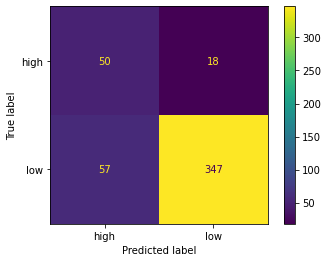

In [33]:
plot_confusion_matrix(finalvtc,stimXtest, stimYtest)

In [34]:
pkl.dump(finalvtc,open('finaloverallvtc.pkl','wb'))

In [5]:
stimXtrain

,Age,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SensationSeeking,Alchol,Caff,Chocalate,Nicotine,depressant,hallucinagen
0,2,-1,38.000000,50.000000,48.000000,33.000000,42.000000,4.000000,9.000000,0,6,5,0,1.500000,4.666667
1,3,2,33.000000,40.000000,43.000000,43.000000,42.000000,3.000000,1.000000,2,6,6,0,0.000000,0.000000
2,3,0,43.000000,39.000000,38.000000,44.000000,41.000000,4.000000,8.000000,5,6,5,6,0.500000,0.000000
3,3,0,33.000000,41.000000,33.000000,40.000000,45.000000,2.000000,5.000000,4,6,6,1,0.000000,0.000000
4,2,4,34.000000,38.000000,43.000000,56.000000,52.000000,2.000000,7.000000,4,6,5,1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,1,0,42.243359,47.621679,54.621679,48.243359,35.945801,8.189160,10.189160,5,5,6,5,0.472901,1.315267
2454,1,0,50.486340,34.205464,49.691804,46.308196,33.513660,7.000000,8.691804,3,6,5,0,2.897268,2.136976
2455,1,0,37.185856,32.221217,51.407072,39.517681,48.703536,4.000000,8.703536,4,6,5,6,2.110608,3.296464
2456,1,1,32.224138,42.408046,52.000000,40.367816,45.775862,3.591954,6.591954,5,6,6,4,2.387931,3.122605
